# Intro to ML Lab

# 1 Missing Data and Outliers

## 1.1 Opening Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [15]:

fileName = 'weather-ML.csv'
colNames = [
'Outlook',
'Temp',
'Humidity',
'Windy',
'Play'
]
data = pd.read_csv(fileName, names=colNames)
print(data)

     Outlook  Temp  Humidity  Windy Play
0      sunny    85        85  False   no
1      sunny    80        90   True   no
2   overcast    83        86  False  yes
3      rainy    70        96  False  yes
4      rainy    68        80  False  yes
5      rainy    65        70   True   no
6   overcast    64        65   True  yes
7      sunny    72        95  False   no
8      sunny    69        70  False  yes
9      rainy    75        80  False  yes
10     sunny    75        70   True  yes
11  overcast    72        90   True  yes
12  overcast    81        75  False  yes
13     rainy    71        91   True   no


In [16]:
from sklearn import preprocessing
data = data.apply(preprocessing.LabelEncoder().fit_transform)
print(data)

    Outlook  Temp  Humidity  Windy  Play
0         2    11         4      0     0
1         2     8         6      1     0
2         0    10         5      0     1
3         1     4         9      0     1
4         1     2         3      0     1
5         1     1         1      1     0
6         0     0         0      1     1
7         2     6         8      0     0
8         2     3         1      0     1
9         1     7         3      0     1
10        2     7         1      1     1
11        0     6         6      1     1
12        0     9         2      0     1
13        1     5         7      1     0


## 1.2 Describe the data

In [17]:
print(data.describe())
#print(data.dtypes)

         Outlook       Temp   Humidity      Windy       Play
count  14.000000  14.000000  14.000000  14.000000  14.000000
mean    1.071429   5.642857   4.000000   0.428571   0.642857
std     0.828742   3.342204   2.882307   0.513553   0.497245
min     0.000000   0.000000   0.000000   0.000000   0.000000
25%     0.250000   3.250000   1.250000   0.000000   0.000000
50%     1.000000   6.000000   3.500000   0.000000   1.000000
75%     2.000000   7.750000   6.000000   1.000000   1.000000
max     2.000000  11.000000   9.000000   1.000000   1.000000


### 1.3 Missing

In [10]:
print("Count the elements, per column, that are zeros")
print((data == 0).sum())
print()
print("Count the elements, per column, that are less than zero")
print((data < 0).sum())
print()
print("Show the Standard deviation, per column")
print(data.std())
print()
print("Show the average, per column")
print(data.mean())
print("Count the elements in the Temp column that are zeros")
print((data['Temp'] == 0).sum())
print()
print("Count the elements in the Temp column that are below zero")
print((data['Temp'] < 0).sum())
print()
print("Show the average of the Temp column")
print(data['Temp'].mean())

Count the elements, per column, that are zeros
Outlook     4
Temp        1
Humidity    1
Windy       8
Play        5
dtype: int64

Count the elements, per column, that are less than zero
Outlook     0
Temp        0
Humidity    0
Windy       0
Play        0
dtype: int64

Show the Standard deviation, per column
Outlook     0.828742
Temp        3.342204
Humidity    2.882307
Windy       0.513553
Play        0.497245
dtype: float64

Show the average, per column
Outlook     1.071429
Temp        5.642857
Humidity    4.000000
Windy       0.428571
Play        0.642857
dtype: float64
Count the elements in the Temp column that are zeros
1

Count the elements in the Temp column that are below zero
0

Show the average of the Temp column
5.642857142857143


## 1.4 Outliers

Outlook
Temp
Humidity
Windy
Play



Column/Attribue: OUTLOOK
--------------------------------
Summary:
Skew is -0.14480.
N outside of two STD:	 0 	( 0.0 %)
N outside of three STD:	 0 	( 0.0 %)


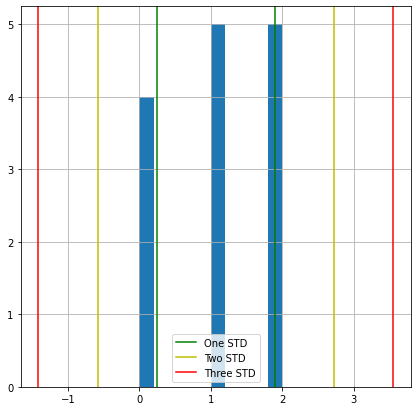

Column/Attribue: TEMP
--------------------------------
Summary:
Skew is -0.14129.
N outside of two STD:	 0 	( 0.0 %)
N outside of three STD:	 0 	( 0.0 %)


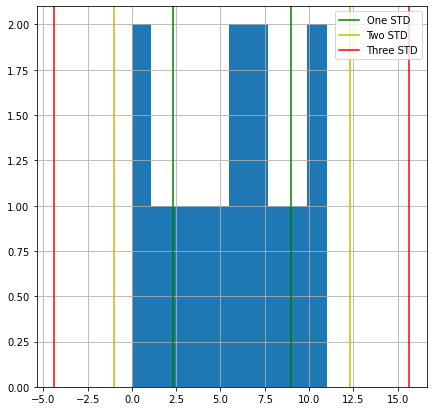

Column/Attribue: HUMIDITY
--------------------------------
Summary:
Skew is 0.29233.
N outside of two STD:	 0 	( 0.0 %)
N outside of three STD:	 0 	( 0.0 %)


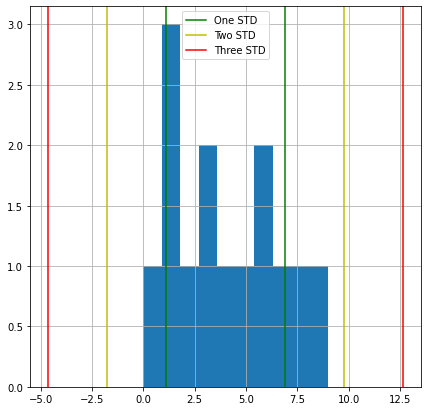

Column/Attribue: WINDY
--------------------------------
Summary:
Skew is 0.32454.
N outside of two STD:	 0 	( 0.0 %)
N outside of three STD:	 0 	( 0.0 %)


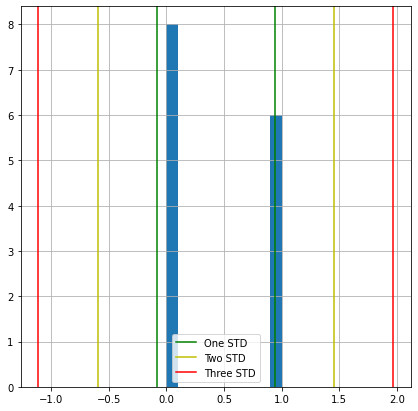

Column/Attribue: PLAY
--------------------------------
Summary:
Skew is -0.67036.
N outside of two STD:	 0 	( 0.0 %)
N outside of three STD:	 0 	( 0.0 %)


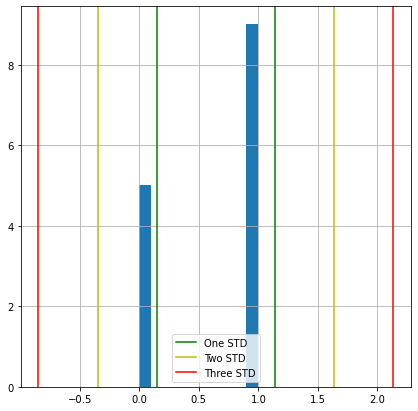

In [11]:
"""
The following plotAttribute() function does not have to be learned, but you must be able to copy/paste it and use it in a CA.
Know what it does, not haow it does it.
"""
def plotAttribute(featureName):
    oneSTD = data[featureName].std()
    twoSTD = oneSTD * 2
    threeSTD = oneSTD * 3
    meanValue = data[featureName].mean()
    print("Column/Attribue:", featureName.upper())
    print("--------------------------------")
    print("Summary:")
    print(f"Skew is {data[featureName].skew():7.5f}.")
    instances = data.shape[0]
    outsideTwo = ((data[featureName] < (meanValue - twoSTD)).sum() + (data[featureName] > (meanValue + twoSTD)).sum())
    outsideThree = ((data[featureName] < (meanValue - threeSTD)).sum() +(data[featureName] > (meanValue + threeSTD)).sum())
    print("N outside of two STD:\t", outsideTwo, "\t(", round((outsideTwo/instances) *100, 2),"%)")
    print("N outside of three STD:\t", outsideThree, "\t(", round((outsideThree/instances) * 100, 2),"%)")
    plt.axvline(x=(meanValue - oneSTD), label='One STD', c="g")
    plt.axvline(x=(meanValue + oneSTD), c="g")
    plt.axvline(x=(meanValue - twoSTD), label='Two STD', c="y")
    plt.axvline(x=(meanValue + twoSTD), c="y")
    plt.axvline(x=(meanValue - threeSTD), label='Three STD', c="r")
    plt.axvline(x=(meanValue + threeSTD), c="r")
    data[featureName].hist(figsize=(7,7))
    plt.legend()
    plt.show()


for colName in colNames:
    print(colName)
print("\n\n")

for colName in colNames:
    plotAttribute(colName)